## Importing necesaary libraries.
### we will be using tensorflow which is a deep learning framework

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import os
import cv2
import imghdr
import numpy as np

C:\Users\saurav\AppData\Local\Temp\ipykernel_13508\1007502630.py:7: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Here we have made a list of acceptable file extension for our project. Using the # os module , we can get the current working directory and then join it with the desired path to access any file or folder in that location.After which using cv2 we are reading image and with imghdr checking for the type of file.Those not accepted  by us will be removed from the dataset.

In [2]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
os.listdir(data_dir)

['cats', 'dogs']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

## Using keras.utils.image_dataset_from_directory, we can directly load the  images from a directory into a TensorFlow dataset object.
# This function returns a tuple (x,y) 1. image array 2. label

In [5]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 307 files belonging to 2 classes.


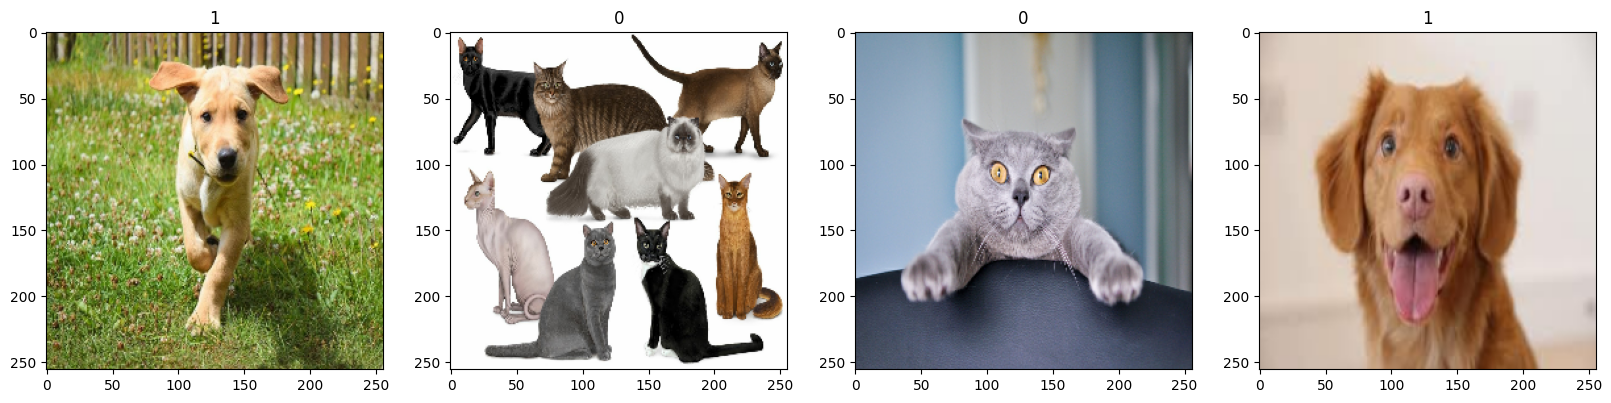

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Reducing the dimensions to be in range [0,1]

In [7]:
data = data.map(lambda x,y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.9764706 , 0.8901961 ],
          [0.99607843, 0.9764706 , 0.8901961 ],
          [0.99607843, 0.9764706 , 0.8901961 ],
          ...,
          [1.        , 0.9490196 , 0.8235294 ],
          [1.        , 0.9490196 , 0.8235294 ],
          [1.        , 0.9490196 , 0.8235294 ]],
 
         [[0.99607843, 0.97970283, 0.8837316 ],
          [0.99607843, 0.97970283, 0.8837316 ],
          [0.99607843, 0.97970283, 0.8837316 ],
          ...,
          [1.        , 0.9490196 , 0.8235294 ],
          [1.        , 0.9490196 , 0.8235294 ],
          [1.        , 0.9490196 , 0.8235294 ]],
 
         [[0.99607843, 0.98039216, 0.88235295],
          [0.99607843, 0.98039216, 0.88235295],
          [0.99607843, 0.98039216, 0.88235295],
          ...,
          [1.        , 0.9490196 , 0.8235294 ],
          [1.        , 0.9490196 , 0.8235294 ],
          [1.        , 0.9490196 , 0.8235294 ]],
 
         ...,
 
         [[0.92941177, 0.9490196 , 0.9607843 ],
          [0.92271

## Here we define the size of our train, test and validation sets.
### We will use 70% for training, 20% for testing and  10% for validation.

### After which we divide out  data into these sections: training, validation and testing



In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Defining our model. 

In [11]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 


 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (De

## Log the metrics in the log directory

In [13]:
logdir='logs'

In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [15]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 7s 687ms/step - loss: 0.8074 - accuracy: 0.5357 - val_loss: 0.7150 - val_accuracy: 0.3594
Epoch 2/20
7/7 [==============================] - 6s 658ms/step - loss: 0.6927 - accuracy: 0.5089 - val_loss: 0.6781 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 7s 792ms/step - loss: 0.6797 - accuracy: 0.5402 - val_loss: 0.6400 - val_accuracy: 0.6562
Epoch 4/20
7/7 [==============================] - 7s 768ms/step - loss: 0.6313 - accuracy: 0.6250 - val_loss: 0.5933 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 7s 780ms/step - loss: 0.5787 - accuracy: 0.7545 - val_loss: 0.5843 - val_accuracy: 0.7188
Epoch 6/20
7/7 [==============================] - 7s 809ms/step - loss: 0.5218 - accuracy: 0.7455 - val_loss: 0.5134 - val_accuracy: 0.7344
Epoch 7/20
7/7 [==============================] - 7s 802ms/step - loss: 0.4500 - accuracy: 0.8170 - val_loss: 0.3889 - val_accuracy: 0.8125
Epoch 8/20
7/7 [===============

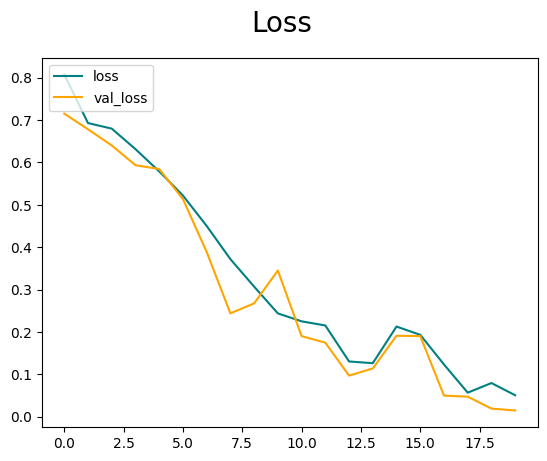

In [16]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

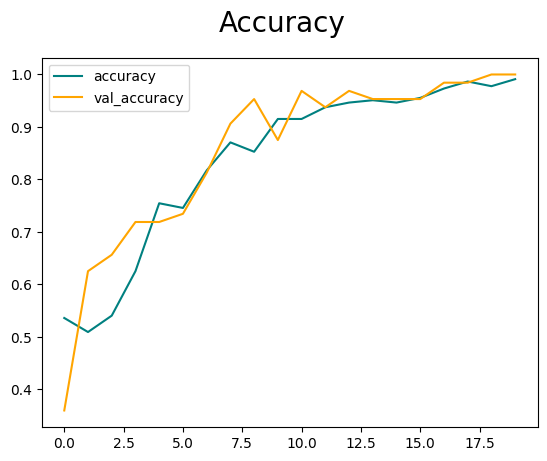

In [17]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [18]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [19]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

### Prediction on the test set

In [20]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 129ms/step


In [21]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


### Reading new image and predicting its class

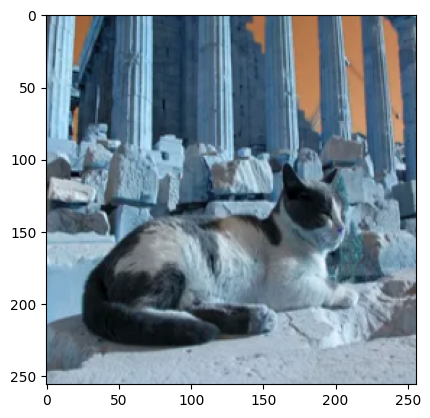

In [22]:
img = cv2.imread('cat-suns-hill-Parthenon-Athens-Greece-Acropolis.webp')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [23]:
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

1/1 [==============================] - 0s 29ms/step
Predicted class is Cat


## The model Predicts the class with 100% accuracy. However this  is not a realistic scenario as it assumes that all features are equally important and there is no noise in the data.

## The model achieved 100% accuracy when trained.
## Keep in mind the  following points:
- It is important to note that achieving a perfect score (100%) does not necessarily mean that your model will perform well.
- This is a very basic example and may not be suitable for all use cases.
- Keep in track of your models evaluation and its performance and if necesaary fine tune your model
- For more complex tasks, you will likely need to preprocess your data differently or train on multiple datasets.